In [1]:
import string
import pandas as pd
from nltk.corpus import stopwords
import numpy as np

In [2]:
df_Spam=pd.read_csv('../SpamCollection/SpamCollection',sep='\t',names=['response','message'])
df_Spam.head()

,response,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df_Spam.shape

(5572, 2)

In [4]:
df_Spam.describe()

,response,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
df_Spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   response  5572 non-null   object
 1   message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df_Spam.groupby('response').describe() 

message                                                            \
           count unique                                                top   
response                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    653  Please call our customer service representativ...   

               
         freq  
response       
ham        30  
spam        4

In [7]:
#Verify length of the messages and also add it as a new column 
df_Spam['length']=df_Spam['message'].apply(len)
df_Spam.head()

,response,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [9]:
len(df_Spam['message'].iloc[2])

155

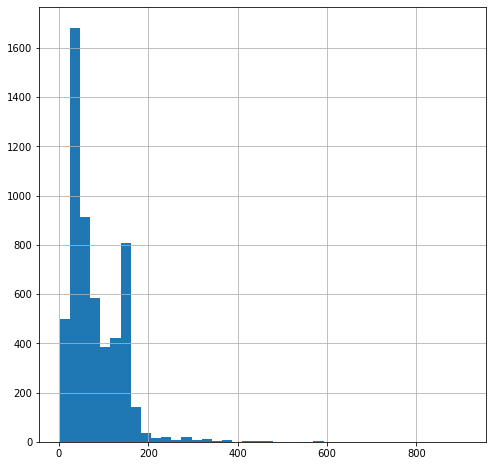

In [10]:
# histogram for the lengths of the message
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,8))
df_Spam['length'].hist(bins=40)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe802f3e650>,
      dtype=object)

<Figure size 1296x648 with 0 Axes>

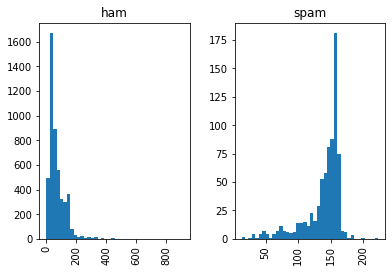

In [12]:
# histogram for the lengths of the mail by label

plt.figure(figsize=(18,9))

df_Spam.hist(bins=40,by='response',column='length')

In [13]:
df_Spam['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [15]:
# what is the body for mail for max chars

df_Spam[df_Spam['length']==910].iloc[0,1]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [16]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
#define a function to get rid of stopwords present in the messages
#now eliminate stop words
def clean(df):
    no_punct=[char for char in df if char not in string.punctuation]
    no_punct=''.join(no_punct)
    return [word for word in no_punct.split() if word not in stopwords.words('english')]
    


In [18]:
no_spam=print(clean(df_Spam['message'].head()))
no_spam

# alt, say
'''df_Spam['message'].head().apply(clean)'''

['Go', 'jurong', 'point,', 'crazy..', 'Available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet...', 'Cine', 'got', 'amore', 'wat...Ok', 'lar...', 'Joking', 'wif', 'u', 'oni...Free', 'entry', '2', 'wkly', 'comp', 'win', 'FA', 'Cup', 'final', 'tkts', '21st', 'May', '2005.', 'Text', 'FA', '87121', 'receive', 'entry', 'question(std', 'txt', "rate)T&C's", 'apply', "08452810075over18'sU", 'dun', 'say', 'early', 'hor...', 'U', 'c', 'already', 'say...Nah', 'I', 'think', 'goes', 'usf,', 'lives', 'around', 'though']


"df_Spam['message'].head().apply(clean)"

In [19]:
#start text processing with vectorizer 
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
#use bag of words by applying the function and fit the data into it
bag_of_words=CountVectorizer(analyzer=clean).fit(df_Spam['message'])

In [21]:
#print length of bag of words stored in the vocabulary_ attribute
len(bag_of_words.vocabulary_)

11617

In [78]:
bag_of_words.vocabulary_

{'Go': 2113,
 'jurong': 7747,
 'point': 9109,
 'crazy': 5961,
 'Available': 1133,
 'bugis': 5410,
 'n': 8528,
 'great': 7129,
 'world': 11355,
 'la': 7860,
 'e': 6409,
 'buffet': 5409,
 'Cine': 1521,
 'got': 7098,
 'amore': 4845,
 'wat': 11157,
 'Ok': 3177,
 'lar': 7893,
 'Joking': 2535,
 'wif': 11264,
 'u': 10890,
 'oni': 8782,
 'Free': 1993,
 'entry': 6523,
 '2': 423,
 'wkly': 11315,
 'comp': 5811,
 'win': 11276,
 'FA': 1882,
 'Cup': 1589,
 'final': 6749,
 'tkts': 10704,
 '21st': 443,
 'May': 2896,
 '2005': 430,
 'Text': 4095,
 '87121': 871,
 'receive': 9444,
 'questionstd': 9351,
 'txt': 10878,
 'rateTCs': 9392,
 'apply': 4923,
 '08452810075over18s': 73,
 'U': 4221,
 'dun': 6396,
 'say': 9746,
 'early': 6414,
 'hor': 7378,
 'c': 5453,
 'already': 4821,
 'Nah': 3047,
 'I': 2362,
 'dont': 6315,
 'think': 10625,
 'goes': 7069,
 'usf': 10991,
 'lives': 8034,
 'around': 4969,
 'though': 10642,
 'FreeMsg': 1995,
 'Hey': 2290,
 'darling': 6056,
 '3': 543,
 'weeks': 11203,
 'word': 11342,
 

In [22]:
#store bag of words for messages using transform method
bagofwords_message=bag_of_words.transform(df_Spam['message'])

In [23]:
print(bagofwords_message)
print(bagofwords_message.data)

  (0, 1133)	1
  (0, 1521)	1
  (0, 2113)	1
  (0, 4845)	1
  (0, 5409)	1
  (0, 5410)	1
  (0, 5961)	1
  (0, 6409)	1
  (0, 7098)	1
  (0, 7129)	1
  (0, 7747)	1
  (0, 7860)	1
  (0, 8528)	1
  (0, 9109)	1
  (0, 11157)	1
  (0, 11355)	1
  (1, 2535)	1
  (1, 3177)	1
  (1, 7893)	1
  (1, 8782)	1
  (1, 10890)	1
  (1, 11264)	1
  (2, 73)	1
  (2, 423)	1
  (2, 430)	1
  :	:
  (5568, 11610)	1
  (5569, 3349)	1
  (5569, 3852)	1
  (5569, 8444)	1
  (5569, 10391)	1
  (5570, 2362)	1
  (5570, 4109)	1
  (5570, 4700)	1
  (5570, 5247)	1
  (5570, 5443)	1
  (5570, 6474)	1
  (5570, 6891)	1
  (5570, 6991)	1
  (5570, 7176)	1
  (5570, 7479)	1
  (5570, 7586)	1
  (5570, 7992)	1
  (5570, 8612)	1
  (5570, 10107)	1
  (5570, 10979)	1
  (5570, 11198)	1
  (5571, 2472)	1
  (5571, 3553)	1
  (5571, 8540)	1
  (5571, 10840)	1
[1 1 1 ... 1 1 1]


In [74]:
# non zero elements
non_zero=bagofwords_message.nnz
non_zero

56024

In [76]:
total=56024*11617

In [77]:
# sparsity of the matrix
non_zero/total


8.608074373762589e-05

In [24]:
#apply tfidf transformer and fit the bag of words into it (transformed version)
from sklearn.feature_extraction.text import TfidfTransformer
tfidf=TfidfTransformer().fit(bagofwords_message)

In [25]:
#print shape of the tfidf 
tfidf_message=tfidf.transform(bagofwords_message)
tfidf_message.shape

(5572, 11617)

In [26]:
#choose naive Bayes model to detect the spam and fit the tfidf data into it
from sklearn.naive_bayes import MultinomialNB
spam_detect_model=MultinomialNB().fit(tfidf_message,df_Spam['response'])

In [27]:
#check model for the predicted and expected value say for message#2 and message#5
message2 = df_Spam['message'][2]
#transform message to bag of words
message2_bagofwords=bag_of_words.transform([message2])
#transform message to tfidf
message2_tfidf=tfidf.transform(message2_bagofwords)

print('predicted',spam_detect_model.predict(message2_tfidf)[0])
print('expected', df_Spam.response[2])


predicted spam
expected spam


In [30]:
# after training the model , we will predict

preds=spam_detect_model.predict(tfidf_message)
preds

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [33]:
from sklearn.metrics import classification_report
# classification_report(actual,predicted)

print(classification_report(df_Spam['response'],preds))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.84      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



In [34]:
spam_detect_model.predict_proba(tfidf_message)

array([[0.98831018, 0.01168982],
       [0.992755  , 0.007245  ],
       [0.03017092, 0.96982908],
       ...,
       [0.88134454, 0.11865546],
       [0.99598452, 0.00401548],
       [0.97099967, 0.02900033]])

In [35]:
#data can be divided nto train and test
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,y_train,y_test=train_test_split(df_Spam['message'],df_Spam['response'],test_size=0.25)

In [38]:
X_train.shape

(4179,)

In [39]:
X_test.shape

(1393,)

In [40]:
X_train[:5]

4937                             K..k.:)congratulation ..
5029    Go chase after her and run her over while she'...
1366    HOT LIVE FANTASIES call now 08707509020 Just 2...
3938    Yeah, in fact he just asked if we needed anyth...
17      Eh u remember how 2 spell his name... Yes i di...
Name: message, dtype: object

In [41]:
# instead of re -running the entire thing, we will create a workflow pipeline
from sklearn.pipeline import Pipeline

In [46]:
pipeline=Pipeline([('bag_of_words',CountVectorizer(analyzer=clean)),
                   ('tfidf',TfidfTransformer()),
                   ('classification',MultinomialNB())])

In [44]:
pipeline

Pipeline(memory=None,
         steps=[('bag_of_words',
                 CountVectorizer(analyzer=None, binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classification',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [47]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bag_of_words',
                 CountVectorizer(analyzer=<function clean at 0x7fe802b72200>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classification',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [48]:
# predict on test data

preds=pipeline.predict(X_test)

In [49]:
preds

array(['ham', 'ham', 'spam', ..., 'ham', 'spam', 'ham'], dtype='<U4')

In [50]:
# accuracy of the naive bayes model on the test data
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1219
        spam       1.00      0.73      0.84       174

    accuracy                           0.97      1393
   macro avg       0.98      0.86      0.91      1393
weighted avg       0.97      0.97      0.96      1393



In [51]:
# random forest classification on the dataset. Decision tree can also be used

from sklearn.ensemble import RandomForestClassifier

In [52]:
ipeline=Pipeline([('bag_of_words',CountVectorizer(analyzer=clean)),
                   ('tfidf',TfidfTransformer()),
                   ('classification',RandomForestClassifier())])

In [53]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bag_of_words',
                 CountVectorizer(analyzer=<function clean at 0x7fe802b72200>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classification',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [54]:
# predict on test data

preds=pipeline.predict(X_test)

In [55]:
preds

array(['ham', 'ham', 'spam', ..., 'ham', 'spam', 'ham'], dtype='<U4')

In [56]:
# accuracy of the random forest on the test data
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1219
        spam       1.00      0.73      0.84       174

    accuracy                           0.97      1393
   macro avg       0.98      0.86      0.91      1393
weighted avg       0.97      0.97      0.96      1393



In [57]:
# stemming - strip the suffixes from the sentence

# lemmatization - finding root word

In [58]:
from nltk.stem.porter import PorterStemmer

In [59]:
stem=PorterStemmer()

In [61]:
word='multiplying'
stem.stem(word)

'multipli'

In [62]:
stem.stem('driving')

'drive'

In [63]:
# lemmatization - obtain the root form of the word.
# getting to the root is not just removing the suffix


from nltk.stem import WordNetLemmatizer

In [64]:
lemmatizer=WordNetLemmatizer()
# the part of speech 
lemmatizer.lemmatize('better',pos='a')

LookupError: 
**********************************************************************
  Resource [93mwordnet[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('wordnet')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/wordnet[0m

  Searched in:
    - '/home/martha/nltk_data'
    - '/home/martha/anaconda3/nltk_data'
    - '/home/martha/anaconda3/share/nltk_data'
    - '/home/martha/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [65]:
lemmatizer.lemmatize('multiplying',pos='v')

LookupError: 
**********************************************************************
  Resource [93mwordnet[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('wordnet')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/wordnet[0m

  Searched in:
    - '/home/martha/nltk_data'
    - '/home/martha/anaconda3/nltk_data'
    - '/home/martha/anaconda3/share/nltk_data'
    - '/home/martha/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [67]:
corpus=[' this is the data science with SL class',
       'AI class is the next class',
       'and this is the third class ML',
       'and this is the first SL class']
corpus

[' this is the data science with SL class',
 'AI class is the next class',
 'and this is the third class ML',
 'and this is the first SL class']

In [68]:
# ngram_range =1,1 - 1 word each from the documnet
vectorizer=CountVectorizer(ngram_range=(1,1))
X=vectorizer.fit_transform(corpus)

In [69]:
print(vectorizer.get_feature_names())

['ai', 'and', 'class', 'data', 'first', 'is', 'ml', 'next', 'science', 'sl', 'the', 'third', 'this', 'with']


In [70]:
X

<4x14 sparse matrix of type '<class 'numpy.int64'>'
	with 27 stored elements in Compressed Sparse Row format>

In [71]:
# array having 14 difffernt words and 4 rows
# the freq for each word in the countverctorizer output
X.toarray()

array([[0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1],
       [1, 0, 2, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0],
       [0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0]])